In [0]:
from google.colab import drive
drive.mount('/content/drive/')
from google.colab import files

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Reshape, Dense, Dropout, Flatten
from keras.layers.advanced_activations import LeakyReLU
#from keras.layers.convolutional import Convolution2D, UpSampling2D
from keras.layers.normalization import BatchNormalization
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import backend as K
from keras import initializers

Using TensorFlow backend.


In [0]:

def GAN(image_size,Neurons=256, Learning_rate=0.0002,beta1=.5,randNoiseDim=10):
  adam = Adam(lr=Learning_rate, beta_1=beta1)
  generator = Sequential()
  generator.add(Dense(Neurons, input_dim=randNoiseDim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
  generator.add(LeakyReLU(0.2))
  generator.add(Dense(Neurons*2))
  generator.add(LeakyReLU(0.2))
  generator.add(Dense(Neurons*4))
  generator.add(LeakyReLU(0.2))
  generator.add(Dense(image_size, activation='tanh'))
  generator.compile(loss='binary_crossentropy', optimizer=adam)
  generator.summary()
  discriminator = Sequential()
  discriminator.add(Dense(Neurons*4, input_dim=784, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.3))
  discriminator.add(Dense(Neurons*2))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.3))
  discriminator.add(Dense(Neurons))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.3))
  discriminator.add(Dense(1, activation='sigmoid'))
  discriminator.compile(loss='binary_crossentropy', optimizer=adam)
  discriminator.summary()
  # Combined network
  discriminator.trainable = False
  ganInput = Input(shape=(randNoiseDim,))
  x = generator(ganInput)
  ganOutput = discriminator(x)
  gan = Model(inputs=ganInput, outputs=ganOutput)
  gan.compile(loss='binary_crossentropy', optimizer=adam)
  
  return generator, discriminator,gan

  
  

In [0]:
def plotGeneratedImages(epoch,randDim, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, randDim])
    generatedImages = generator.predict(noise)
    generatedImages = generatedImages.reshape(examples, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(generatedImages.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generatedImages[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('drive/My Drive/gan/gan_generated_image_epoch_%d.png' % epoch)

In [0]:
def train(X_train,discriminator,gan,generator,epochs, batchSize=128,saveFreq=20,randDim=10):
    batchCount = X_train.shape[0] / batchSize
    print 'Epochs:', epochs
    print 'Batch size:', batchSize
    print 'Batches per epoch:', batchCount

    for e in xrange(1, epochs+1):
        print '-'*15, 'Epoch %d' % e, '-'*15
        for _ in tqdm(xrange(batchCount)):
            # Get a random set of input noise and images
            noise = np.random.normal(0, 1, size=[batchSize, randDim])
            imageBatch = X_train[np.random.randint(0, X_train.shape[0], size=batchSize)]

            # Generate fake MNIST images
            generatedImages = generator.predict(noise)
            X = np.concatenate([imageBatch, generatedImages])

            # Labels for generated and real data
            yDis = np.zeros(2*batchSize)
            # One-sided label smoothing
            yDis[:batchSize] = 0.9

            # Train discriminator
            discriminator.trainable = True
            dloss = discriminator.train_on_batch(X, yDis)

            # Train generator
            noise = np.random.normal(0, 1, size=[batchSize, randDim])
            yGen = np.ones(batchSize)
            discriminator.trainable = False
            gloss = gan.train_on_batch(noise, yGen)

        
        if e == 1 or e % saveFreq == 0:
            plotGeneratedImages(e,randDim=randomNoiseDim)
    generator.save('drive/My Drive/gan/gan_generator.h5')
    discriminator.save('drive/My Drive/gan/gan_discriminator.h5')        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 784)               803600    
Total para

  0%|          | 0/468 [00:00<?, ?it/s]

Epochs: 200
Batch size: 128
Batches per epoch: 468
--------------- Epoch 1 ---------------


  1%|          | 4/468 [00:00<00:11, 39.54it/s]

--------------- Epoch 2 ---------------


  1%|          | 4/468 [00:00<00:11, 39.16it/s]

--------------- Epoch 3 ---------------


  1%|          | 4/468 [00:00<00:12, 38.05it/s]

--------------- Epoch 4 ---------------


  1%|          | 5/468 [00:00<00:11, 41.83it/s]

--------------- Epoch 5 ---------------


  1%|          | 5/468 [00:00<00:11, 41.28it/s]

--------------- Epoch 6 ---------------


  1%|          | 5/468 [00:00<00:10, 42.22it/s]

--------------- Epoch 7 ---------------


  1%|          | 5/468 [00:00<00:11, 40.71it/s]

--------------- Epoch 8 ---------------


  1%|          | 5/468 [00:00<00:11, 41.73it/s]

--------------- Epoch 9 ---------------


  1%|          | 5/468 [00:00<00:11, 41.90it/s]

--------------- Epoch 10 ---------------


  1%|          | 5/468 [00:00<00:11, 41.49it/s]

--------------- Epoch 11 ---------------


  1%|          | 5/468 [00:00<00:10, 42.33it/s]

--------------- Epoch 12 ---------------


  1%|          | 5/468 [00:00<00:11, 40.92it/s]

--------------- Epoch 13 ---------------


  1%|          | 4/468 [00:00<00:11, 39.90it/s]

--------------- Epoch 14 ---------------


  1%|          | 5/468 [00:00<00:11, 41.37it/s]

--------------- Epoch 15 ---------------


  1%|          | 5/468 [00:00<00:11, 41.70it/s]

--------------- Epoch 16 ---------------


  1%|          | 5/468 [00:00<00:11, 41.84it/s]

--------------- Epoch 17 ---------------


  1%|          | 4/468 [00:00<00:12, 38.42it/s]

--------------- Epoch 18 ---------------


  1%|          | 5/468 [00:00<00:11, 41.67it/s]

--------------- Epoch 19 ---------------


  1%|          | 5/468 [00:00<00:11, 41.74it/s]

--------------- Epoch 20 ---------------


  1%|          | 5/468 [00:00<00:11, 41.77it/s]

--------------- Epoch 21 ---------------


  1%|          | 5/468 [00:00<00:11, 42.05it/s]

--------------- Epoch 22 ---------------


  1%|          | 5/468 [00:00<00:11, 42.00it/s]

--------------- Epoch 23 ---------------


  1%|          | 5/468 [00:00<00:11, 41.71it/s]

--------------- Epoch 24 ---------------


  1%|          | 5/468 [00:00<00:10, 42.15it/s]

--------------- Epoch 25 ---------------


  1%|          | 5/468 [00:00<00:11, 42.05it/s]

--------------- Epoch 26 ---------------


  1%|          | 5/468 [00:00<00:10, 42.14it/s]

--------------- Epoch 27 ---------------


  1%|          | 5/468 [00:00<00:11, 40.36it/s]

--------------- Epoch 28 ---------------


  1%|          | 5/468 [00:00<00:11, 41.28it/s]

--------------- Epoch 29 ---------------


  1%|          | 4/468 [00:00<00:11, 39.30it/s]

--------------- Epoch 30 ---------------


  1%|          | 5/468 [00:00<00:10, 42.68it/s]

--------------- Epoch 31 ---------------


  1%|          | 5/468 [00:00<00:11, 41.91it/s]

--------------- Epoch 32 ---------------


  1%|          | 5/468 [00:00<00:11, 42.04it/s]

--------------- Epoch 33 ---------------


  1%|          | 5/468 [00:00<00:11, 41.44it/s]

--------------- Epoch 34 ---------------


  1%|          | 5/468 [00:00<00:10, 42.39it/s]

--------------- Epoch 35 ---------------


  1%|          | 5/468 [00:00<00:11, 41.20it/s]

--------------- Epoch 36 ---------------


  1%|          | 5/468 [00:00<00:11, 41.91it/s]

--------------- Epoch 37 ---------------


  1%|          | 5/468 [00:00<00:11, 42.03it/s]

--------------- Epoch 38 ---------------


  1%|          | 5/468 [00:00<00:11, 41.00it/s]

--------------- Epoch 39 ---------------


  1%|          | 5/468 [00:00<00:10, 42.35it/s]

--------------- Epoch 40 ---------------


  1%|          | 5/468 [00:00<00:11, 40.91it/s]

--------------- Epoch 41 ---------------


  1%|          | 5/468 [00:00<00:11, 40.88it/s]

--------------- Epoch 42 ---------------


  1%|          | 5/468 [00:00<00:11, 42.01it/s]

--------------- Epoch 43 ---------------


  1%|          | 5/468 [00:00<00:11, 40.85it/s]

--------------- Epoch 44 ---------------


  1%|          | 5/468 [00:00<00:11, 40.91it/s]

--------------- Epoch 45 ---------------


  1%|          | 4/468 [00:00<00:11, 38.90it/s]

--------------- Epoch 46 ---------------


  1%|          | 5/468 [00:00<00:11, 41.69it/s]

--------------- Epoch 47 ---------------


  1%|          | 5/468 [00:00<00:10, 42.53it/s]

--------------- Epoch 48 ---------------


  1%|          | 5/468 [00:00<00:11, 41.64it/s]

--------------- Epoch 49 ---------------


  1%|          | 5/468 [00:00<00:10, 42.24it/s]

--------------- Epoch 50 ---------------


  1%|          | 5/468 [00:00<00:10, 42.25it/s]

--------------- Epoch 51 ---------------


  1%|          | 5/468 [00:00<00:10, 42.26it/s]

--------------- Epoch 52 ---------------


  1%|          | 5/468 [00:00<00:11, 41.16it/s]

--------------- Epoch 53 ---------------


  1%|          | 5/468 [00:00<00:11, 41.70it/s]

--------------- Epoch 54 ---------------


  1%|          | 5/468 [00:00<00:11, 41.34it/s]

--------------- Epoch 55 ---------------


  1%|          | 5/468 [00:00<00:11, 41.08it/s]

--------------- Epoch 56 ---------------


  1%|          | 5/468 [00:00<00:10, 42.39it/s]

--------------- Epoch 57 ---------------


  1%|          | 5/468 [00:00<00:11, 41.39it/s]

--------------- Epoch 58 ---------------


  1%|          | 5/468 [00:00<00:10, 42.22it/s]

--------------- Epoch 59 ---------------


  1%|          | 5/468 [00:00<00:11, 39.65it/s]

--------------- Epoch 60 ---------------


  1%|          | 4/468 [00:00<00:12, 38.36it/s]

--------------- Epoch 61 ---------------


  1%|          | 5/468 [00:00<00:11, 41.90it/s]

--------------- Epoch 62 ---------------


  1%|          | 5/468 [00:00<00:10, 42.26it/s]

--------------- Epoch 63 ---------------


  1%|          | 5/468 [00:00<00:11, 41.47it/s]

--------------- Epoch 64 ---------------


  1%|          | 5/468 [00:00<00:11, 41.50it/s]

--------------- Epoch 65 ---------------


  1%|          | 5/468 [00:00<00:11, 42.06it/s]

--------------- Epoch 66 ---------------


  1%|          | 5/468 [00:00<00:10, 42.29it/s]

--------------- Epoch 67 ---------------


  1%|          | 5/468 [00:00<00:10, 42.59it/s]

--------------- Epoch 68 ---------------


  1%|          | 5/468 [00:00<00:11, 41.98it/s]

--------------- Epoch 69 ---------------


  1%|          | 5/468 [00:00<00:10, 42.28it/s]

--------------- Epoch 70 ---------------


  1%|          | 5/468 [00:00<00:11, 41.93it/s]

--------------- Epoch 71 ---------------


  1%|          | 5/468 [00:00<00:11, 41.90it/s]

--------------- Epoch 72 ---------------


  1%|          | 5/468 [00:00<00:11, 41.64it/s]

--------------- Epoch 73 ---------------


  1%|          | 5/468 [00:00<00:10, 42.15it/s]

--------------- Epoch 74 ---------------


  1%|          | 5/468 [00:00<00:11, 41.68it/s]

--------------- Epoch 75 ---------------


  1%|          | 5/468 [00:00<00:10, 42.16it/s]

--------------- Epoch 76 ---------------


  1%|          | 5/468 [00:00<00:11, 41.20it/s]

--------------- Epoch 77 ---------------


  1%|          | 4/468 [00:00<00:11, 38.86it/s]

--------------- Epoch 78 ---------------


  1%|          | 4/468 [00:00<00:11, 39.10it/s]

--------------- Epoch 79 ---------------


  1%|          | 5/468 [00:00<00:11, 41.72it/s]

--------------- Epoch 80 ---------------


  1%|          | 5/468 [00:00<00:11, 41.46it/s]

--------------- Epoch 81 ---------------


  1%|          | 5/468 [00:00<00:11, 41.10it/s]

--------------- Epoch 82 ---------------


  1%|          | 5/468 [00:00<00:10, 42.20it/s]

--------------- Epoch 83 ---------------


  1%|          | 4/468 [00:00<00:11, 39.80it/s]

--------------- Epoch 84 ---------------


  1%|          | 5/468 [00:00<00:10, 42.32it/s]

--------------- Epoch 85 ---------------


  1%|          | 5/468 [00:00<00:10, 42.26it/s]

--------------- Epoch 86 ---------------


  1%|          | 5/468 [00:00<00:11, 41.89it/s]

--------------- Epoch 87 ---------------


  1%|          | 5/468 [00:00<00:10, 42.45it/s]

--------------- Epoch 88 ---------------


  1%|          | 4/468 [00:00<00:12, 37.91it/s]

--------------- Epoch 89 ---------------


  1%|          | 4/468 [00:00<00:12, 38.50it/s]

--------------- Epoch 90 ---------------


  1%|          | 5/468 [00:00<00:11, 40.92it/s]

--------------- Epoch 91 ---------------


  1%|          | 5/468 [00:00<00:11, 40.30it/s]

--------------- Epoch 92 ---------------


  1%|          | 4/468 [00:00<00:11, 39.20it/s]

--------------- Epoch 93 ---------------


  1%|          | 5/468 [00:00<00:11, 41.76it/s]

--------------- Epoch 94 ---------------


  1%|          | 5/468 [00:00<00:11, 41.77it/s]

--------------- Epoch 95 ---------------


  1%|          | 4/468 [00:00<00:11, 39.36it/s]

--------------- Epoch 96 ---------------


  1%|          | 5/468 [00:00<00:11, 40.95it/s]

--------------- Epoch 97 ---------------


  1%|          | 5/468 [00:00<00:11, 41.91it/s]

--------------- Epoch 98 ---------------


  1%|          | 5/468 [00:00<00:11, 41.44it/s]

--------------- Epoch 99 ---------------


  1%|          | 5/468 [00:00<00:10, 42.35it/s]

--------------- Epoch 100 ---------------


  1%|          | 5/468 [00:00<00:11, 41.54it/s]

--------------- Epoch 101 ---------------


  1%|          | 5/468 [00:00<00:10, 42.31it/s]

--------------- Epoch 102 ---------------


  1%|          | 5/468 [00:00<00:11, 40.68it/s]

--------------- Epoch 103 ---------------


  1%|          | 5/468 [00:00<00:11, 41.30it/s]

--------------- Epoch 104 ---------------


  1%|          | 5/468 [00:00<00:10, 42.47it/s]

--------------- Epoch 105 ---------------


  1%|          | 5/468 [00:00<00:11, 40.95it/s]

--------------- Epoch 106 ---------------


  1%|          | 5/468 [00:00<00:11, 41.43it/s]

--------------- Epoch 107 ---------------


  1%|          | 5/468 [00:00<00:11, 41.86it/s]

--------------- Epoch 108 ---------------


  1%|          | 5/468 [00:00<00:11, 40.82it/s]

--------------- Epoch 109 ---------------


  1%|          | 5/468 [00:00<00:11, 41.13it/s]

--------------- Epoch 110 ---------------


  1%|          | 5/468 [00:00<00:10, 42.25it/s]

--------------- Epoch 111 ---------------


  1%|          | 5/468 [00:00<00:11, 41.17it/s]

--------------- Epoch 112 ---------------


  1%|          | 5/468 [00:00<00:10, 42.97it/s]

--------------- Epoch 113 ---------------


  1%|          | 5/468 [00:00<00:10, 42.85it/s]

--------------- Epoch 114 ---------------


  1%|          | 5/468 [00:00<00:10, 42.42it/s]

--------------- Epoch 115 ---------------


  1%|          | 5/468 [00:00<00:11, 41.43it/s]

--------------- Epoch 116 ---------------


  1%|          | 5/468 [00:00<00:10, 42.28it/s]

--------------- Epoch 117 ---------------


  1%|          | 5/468 [00:00<00:11, 40.54it/s]

--------------- Epoch 118 ---------------


  1%|          | 5/468 [00:00<00:11, 41.35it/s]

--------------- Epoch 119 ---------------


  1%|          | 5/468 [00:00<00:11, 41.30it/s]

--------------- Epoch 120 ---------------


  1%|          | 5/468 [00:00<00:11, 41.82it/s]

--------------- Epoch 121 ---------------


  1%|          | 5/468 [00:00<00:11, 41.04it/s]

--------------- Epoch 122 ---------------


  1%|          | 5/468 [00:00<00:11, 41.85it/s]

--------------- Epoch 123 ---------------


  1%|          | 5/468 [00:00<00:11, 41.96it/s]

--------------- Epoch 124 ---------------


  1%|          | 5/468 [00:00<00:10, 42.67it/s]

--------------- Epoch 125 ---------------


  1%|          | 5/468 [00:00<00:10, 42.55it/s]

--------------- Epoch 126 ---------------


  1%|          | 5/468 [00:00<00:10, 42.49it/s]

--------------- Epoch 127 ---------------


  1%|          | 5/468 [00:00<00:11, 41.53it/s]

--------------- Epoch 128 ---------------


  1%|          | 5/468 [00:00<00:10, 42.80it/s]

--------------- Epoch 129 ---------------


  1%|          | 5/468 [00:00<00:10, 42.34it/s]

--------------- Epoch 130 ---------------


  1%|          | 5/468 [00:00<00:11, 41.66it/s]

--------------- Epoch 131 ---------------


  1%|          | 5/468 [00:00<00:10, 42.56it/s]

--------------- Epoch 132 ---------------


  1%|          | 4/468 [00:00<00:12, 38.20it/s]

--------------- Epoch 133 ---------------


  1%|          | 5/468 [00:00<00:11, 40.99it/s]

--------------- Epoch 134 ---------------


  1%|          | 5/468 [00:00<00:11, 41.24it/s]

--------------- Epoch 135 ---------------


  1%|          | 5/468 [00:00<00:10, 42.24it/s]

--------------- Epoch 136 ---------------


  1%|          | 5/468 [00:00<00:11, 41.68it/s]

--------------- Epoch 137 ---------------


  1%|          | 5/468 [00:00<00:11, 41.73it/s]

--------------- Epoch 138 ---------------


  1%|          | 5/468 [00:00<00:11, 41.98it/s]

--------------- Epoch 139 ---------------


  1%|          | 5/468 [00:00<00:10, 42.57it/s]

--------------- Epoch 140 ---------------


  1%|          | 5/468 [00:00<00:11, 41.91it/s]

--------------- Epoch 141 ---------------


  1%|          | 5/468 [00:00<00:10, 43.11it/s]

--------------- Epoch 142 ---------------


  1%|          | 5/468 [00:00<00:10, 42.74it/s]

--------------- Epoch 143 ---------------


  1%|          | 5/468 [00:00<00:10, 42.16it/s]

--------------- Epoch 144 ---------------


  1%|          | 4/468 [00:00<00:11, 39.94it/s]

--------------- Epoch 145 ---------------


  1%|          | 4/468 [00:00<00:11, 39.70it/s]

--------------- Epoch 146 ---------------


  1%|          | 5/468 [00:00<00:10, 42.16it/s]

--------------- Epoch 147 ---------------


  1%|          | 5/468 [00:00<00:10, 42.10it/s]

--------------- Epoch 148 ---------------


  1%|          | 5/468 [00:00<00:11, 41.81it/s]

--------------- Epoch 149 ---------------


  1%|          | 5/468 [00:00<00:10, 42.87it/s]

--------------- Epoch 150 ---------------


  1%|          | 5/468 [00:00<00:10, 42.46it/s]

--------------- Epoch 151 ---------------


  1%|          | 5/468 [00:00<00:10, 42.62it/s]

--------------- Epoch 152 ---------------


  1%|          | 5/468 [00:00<00:10, 42.54it/s]

--------------- Epoch 153 ---------------


  1%|          | 5/468 [00:00<00:10, 42.38it/s]

--------------- Epoch 154 ---------------


  1%|          | 5/468 [00:00<00:11, 41.10it/s]

--------------- Epoch 155 ---------------


  1%|          | 5/468 [00:00<00:11, 41.65it/s]

--------------- Epoch 156 ---------------


  1%|          | 5/468 [00:00<00:11, 41.55it/s]

--------------- Epoch 157 ---------------


  1%|          | 5/468 [00:00<00:10, 42.60it/s]

--------------- Epoch 158 ---------------


  1%|          | 5/468 [00:00<00:11, 41.83it/s]

--------------- Epoch 159 ---------------


  1%|          | 5/468 [00:00<00:11, 41.64it/s]

--------------- Epoch 160 ---------------


  1%|          | 5/468 [00:00<00:11, 41.42it/s]

--------------- Epoch 161 ---------------


  1%|          | 5/468 [00:00<00:11, 40.39it/s]

--------------- Epoch 162 ---------------


  1%|          | 4/468 [00:00<00:11, 38.96it/s]

--------------- Epoch 163 ---------------


  1%|          | 4/468 [00:00<00:12, 38.56it/s]

--------------- Epoch 164 ---------------


  1%|          | 5/468 [00:00<00:11, 41.74it/s]

--------------- Epoch 165 ---------------


  1%|          | 5/468 [00:00<00:10, 42.35it/s]

--------------- Epoch 166 ---------------


  1%|          | 5/468 [00:00<00:11, 41.23it/s]

--------------- Epoch 167 ---------------


  1%|          | 5/468 [00:00<00:11, 41.93it/s]

--------------- Epoch 168 ---------------


  1%|          | 5/468 [00:00<00:11, 41.96it/s]

--------------- Epoch 169 ---------------


  1%|          | 5/468 [00:00<00:11, 41.94it/s]

--------------- Epoch 170 ---------------


  1%|          | 5/468 [00:00<00:11, 41.75it/s]

--------------- Epoch 171 ---------------


  1%|          | 5/468 [00:00<00:11, 41.73it/s]

--------------- Epoch 172 ---------------


  1%|          | 5/468 [00:00<00:11, 41.33it/s]

--------------- Epoch 173 ---------------


  1%|          | 5/468 [00:00<00:11, 41.04it/s]

--------------- Epoch 174 ---------------


  1%|          | 5/468 [00:00<00:11, 41.36it/s]

--------------- Epoch 175 ---------------


  1%|          | 5/468 [00:00<00:10, 42.93it/s]

--------------- Epoch 176 ---------------


  1%|          | 5/468 [00:00<00:10, 42.50it/s]

--------------- Epoch 177 ---------------


  1%|          | 5/468 [00:00<00:11, 41.67it/s]

--------------- Epoch 178 ---------------


  1%|          | 5/468 [00:00<00:10, 42.69it/s]

--------------- Epoch 179 ---------------


  1%|          | 5/468 [00:00<00:10, 42.36it/s]

--------------- Epoch 180 ---------------


  1%|          | 5/468 [00:00<00:11, 42.08it/s]

--------------- Epoch 181 ---------------


  1%|          | 5/468 [00:00<00:11, 41.17it/s]

--------------- Epoch 182 ---------------


  1%|          | 5/468 [00:00<00:11, 39.32it/s]

--------------- Epoch 183 ---------------


  1%|          | 4/468 [00:00<00:11, 38.74it/s]

--------------- Epoch 184 ---------------


  1%|          | 4/468 [00:00<00:11, 39.93it/s]

--------------- Epoch 185 ---------------


  1%|          | 4/468 [00:00<00:12, 38.59it/s]

--------------- Epoch 186 ---------------


  1%|          | 4/468 [00:00<00:11, 39.01it/s]

--------------- Epoch 187 ---------------


  1%|          | 4/468 [00:00<00:11, 39.54it/s]

--------------- Epoch 188 ---------------


  1%|          | 5/468 [00:00<00:10, 42.57it/s]

--------------- Epoch 189 ---------------


  1%|          | 5/468 [00:00<00:11, 41.10it/s]

--------------- Epoch 190 ---------------


  1%|          | 5/468 [00:00<00:11, 40.99it/s]

--------------- Epoch 191 ---------------


  1%|          | 5/468 [00:00<00:10, 43.01it/s]

--------------- Epoch 192 ---------------


  1%|          | 5/468 [00:00<00:11, 41.78it/s]

--------------- Epoch 193 ---------------


  1%|          | 5/468 [00:00<00:11, 42.04it/s]

--------------- Epoch 194 ---------------


  1%|          | 5/468 [00:00<00:10, 42.10it/s]

--------------- Epoch 195 ---------------


  1%|          | 5/468 [00:00<00:11, 41.47it/s]

--------------- Epoch 196 ---------------


  1%|          | 5/468 [00:00<00:11, 41.56it/s]

--------------- Epoch 197 ---------------


  1%|          | 5/468 [00:00<00:10, 42.58it/s]

--------------- Epoch 198 ---------------


  1%|          | 5/468 [00:00<00:10, 42.36it/s]

--------------- Epoch 199 ---------------


  1%|          | 5/468 [00:00<00:10, 42.35it/s]

--------------- Epoch 200 ---------------


100%|██████████| 468/468 [00:11<00:00, 40.88it/s]


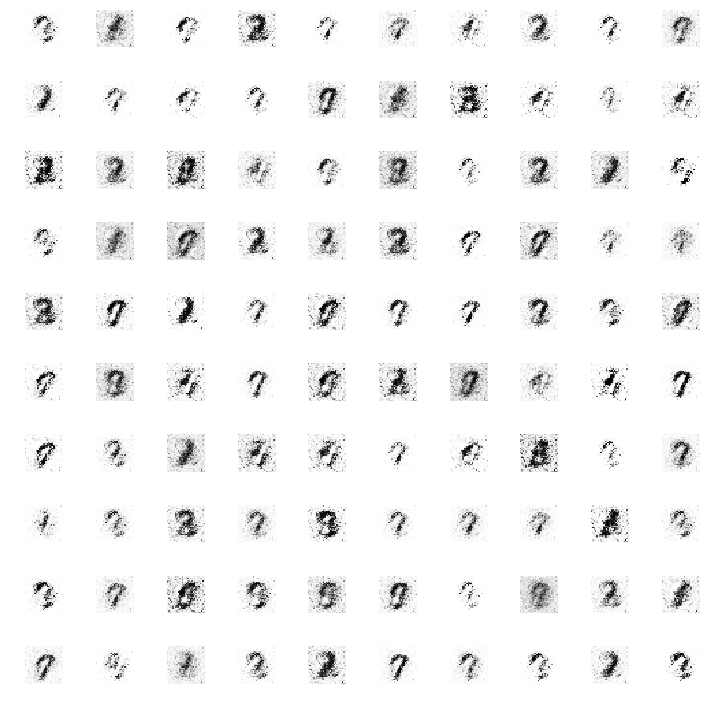

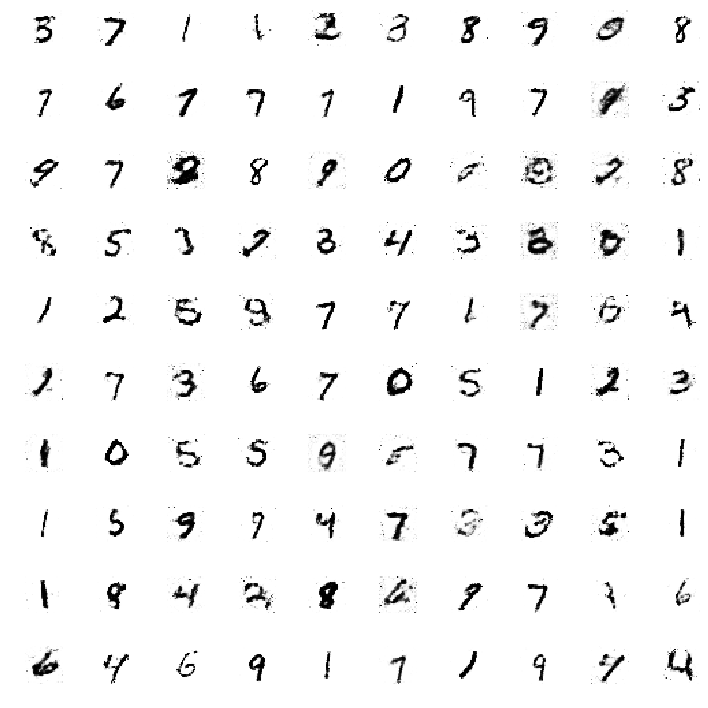

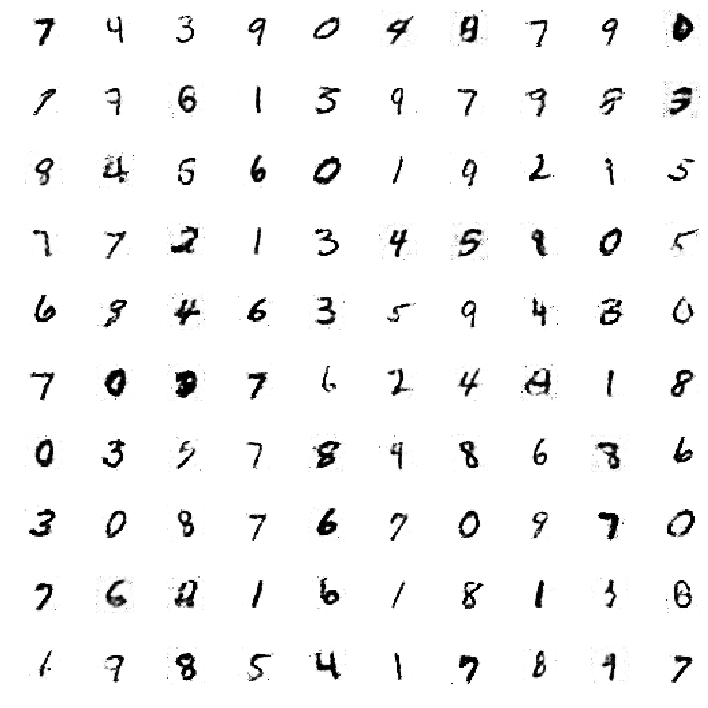

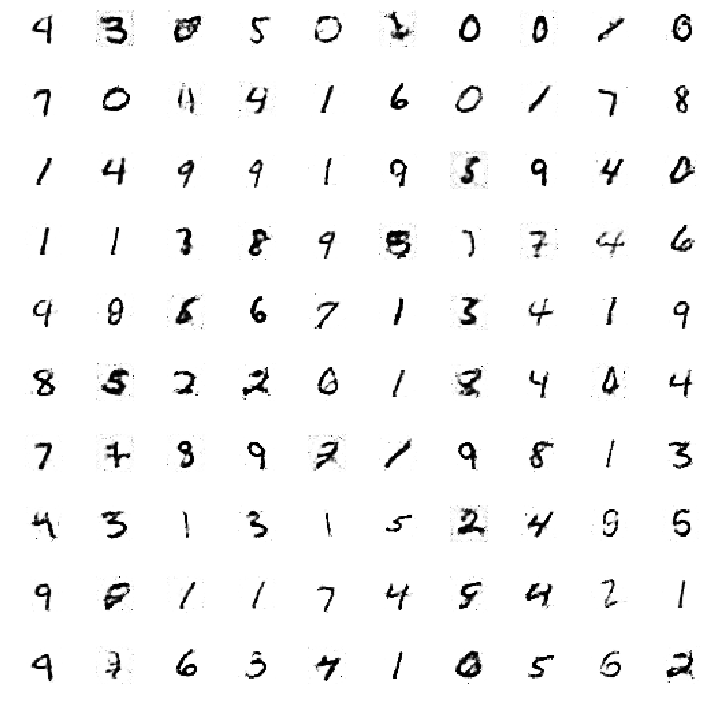

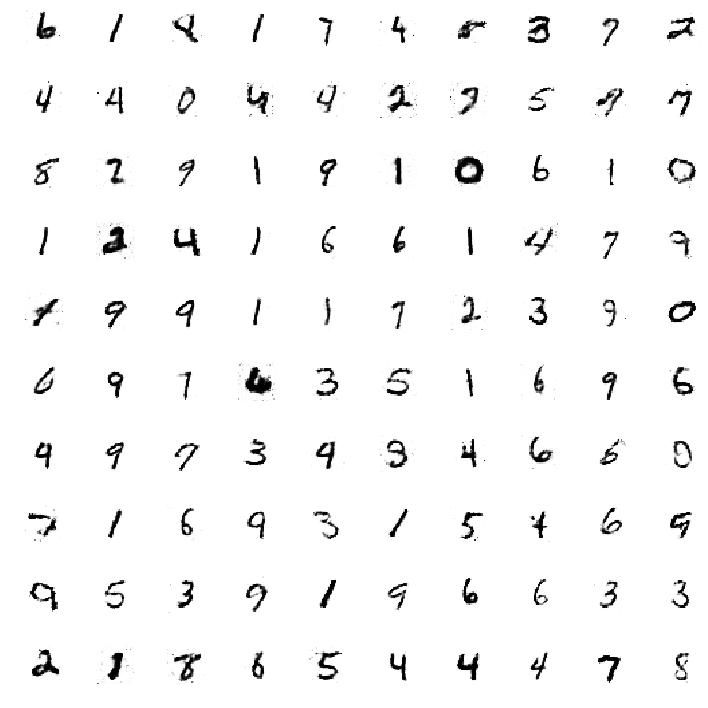

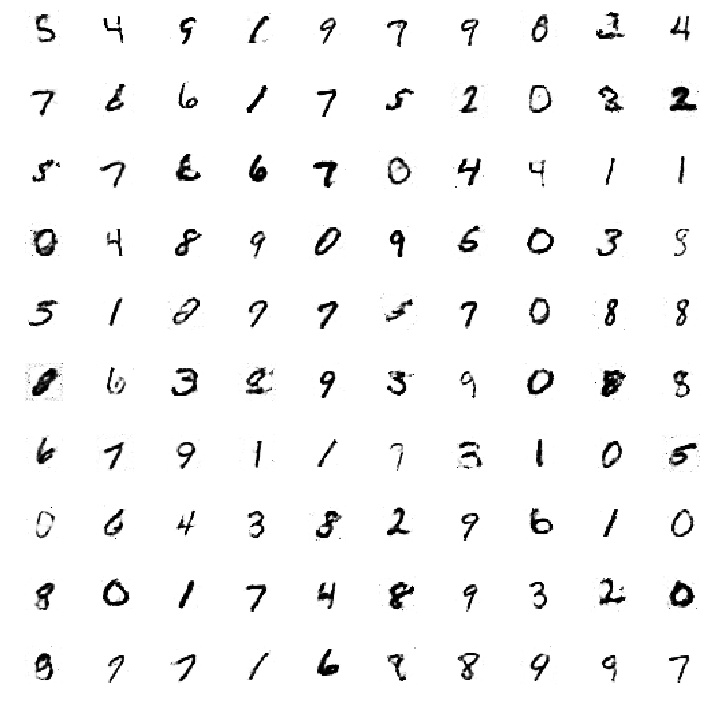

In [0]:
#input noise size
randomNoiseDim = 100
#minst
Height=28
Width=28
Channels=1
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5)/127.5
X_train = X_train.reshape(X_train.shape[0], 784)
generator,discriminator,gan=GAN(image_size=Height*Width*Channels,Neurons=256, Learning_rate=0.0002,beta1=.5,randNoiseDim=randomNoiseDim)
train(X_train,discriminator,gan,generator,epochs=200, batchSize=128,saveFreq=40,randDim=randomNoiseDim)

In [0]:
generator,discriminator,gan=GAN(image_size=Height*Width*Channels,Neurons=256, Learning_rate=0.0002,beta1=.5,randNoiseDim=randomNoiseDim)
train(X_train,discriminator,gan,generator,epochs=200, batchSize=128,saveFreq=40,randDim=randomNoiseDim)

In [0]:
from keras.models import load_model

generator = load_model('drive/My Drive/gan/gan_generator.h5')


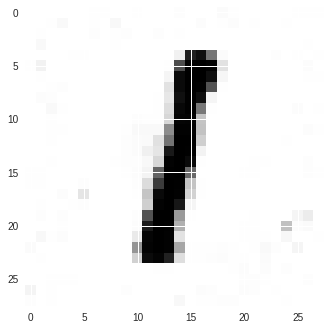

In [0]:
noise = np.random.normal(0, 1, size=[100, 100])
generatedImages = generator.predict(noise)
generatedImages = generatedImages.reshape(100, 28, 28)

#plt.figure(figsize=figsize)
for i in range(generatedImages.shape[0]):
    #plt.subplot(dim[0], dim[1], i+1)
    plt.imshow(generatedImages[i])
#plt.tight_layout()
    plt.savefig('drive/My Drive/gan/images/gan_generated_image_200th_%d.png' % i)